In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vedantpadole","key":"3841cb3f65c269a9264a4ac06efb6c3f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                                9MB  2023-03-20 15:43:25           4465        175  1.0              
ashishraut64/global-methane-emissions                         Global Emissions.                                 31KB  2023-03-27 09:02:51           1421         40  1.0              
muhammedzidan/car-prices-market                               Car Prices Market                                787KB  2023-04-01 10:07:17            782         27  1.0              
thitiwat/top-100-most-expensive-football-transfers            ⚽ Top 100 most expensiv

In [ ]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 99% 147M/148M [00:06<00:00, 32.7MB/s]
100% 148M/148M [00:06<00:00, 24.6MB/s]


In [ ]:
!unzip /content/cotton-disease-dataset.zip

Archive:  /content/cotton-disease-dataset.zip
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (214)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (219)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (224)_iaip.jpg  

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,GlobalMaxPooling2D,Conv2D,Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size=32
img_height=256
img_width=256
train='/content/Cotton Disease/train'

basic=tf.keras.preprocessing.image_dataset_from_directory(
    train,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1951 files belonging to 4 classes.


In [ ]:
class_names=basic.class_names
class_names

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [ ]:
for image_batch,label_batch in basic.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 3 1 1 2 1 1 0 2 0 1 1 1 2 3 0 3 2 0 0 3 0 3 3 2 1 3 1 2 1 1 3]


In [ ]:
for image_batch,label_batch in basic.take(1):
  print(image_batch[0].numpy())

[[[201.92476  168.91304  111.91304 ]
  [225.36005  202.24303  143.96568 ]
  [205.60854  204.51479  138.56166 ]
  ...
  [136.72266  219.27734   46.      ]
  [144.4336   220.4336    50.433594]
  [148.4127   224.4127    54.412704]]

 [[104.016846  88.82544   40.802002]
  [143.73727  139.77974   83.70451 ]
  [168.65935  184.15712  117.61331 ]
  ...
  [141.55385  222.5664    50.578125]
  [144.188    219.6216    53.320816]
  [145.57812  221.01172   54.710938]]

 [[ 68.18155   73.436295  37.428665]
  [ 63.568085  81.535446  32.100174]
  [ 97.88281  133.96605   66.7473  ]
  ...
  [146.84616  225.92308   54.368393]
  [144.       219.        56.      ]
  [143.61821  218.61821   55.61821 ]]

 ...

 [[143.28311  199.96484   76.6875  ]
  [148.51953  206.62639   85.13365 ]
  [153.75511  213.79958   95.83203 ]
  ...
  [105.52855   94.83835   51.728973]
  [107.15654  100.71123   57.265915]
  [114.80878  108.363464  64.91815 ]]

 [[131.14453  203.14453   77.14453 ]
  [131.13281  203.13281   77.13281 ]


In [ ]:
for image_batch,label_batch in basic.take(1):
  print(image_batch[0].shape)

(256, 256, 3)


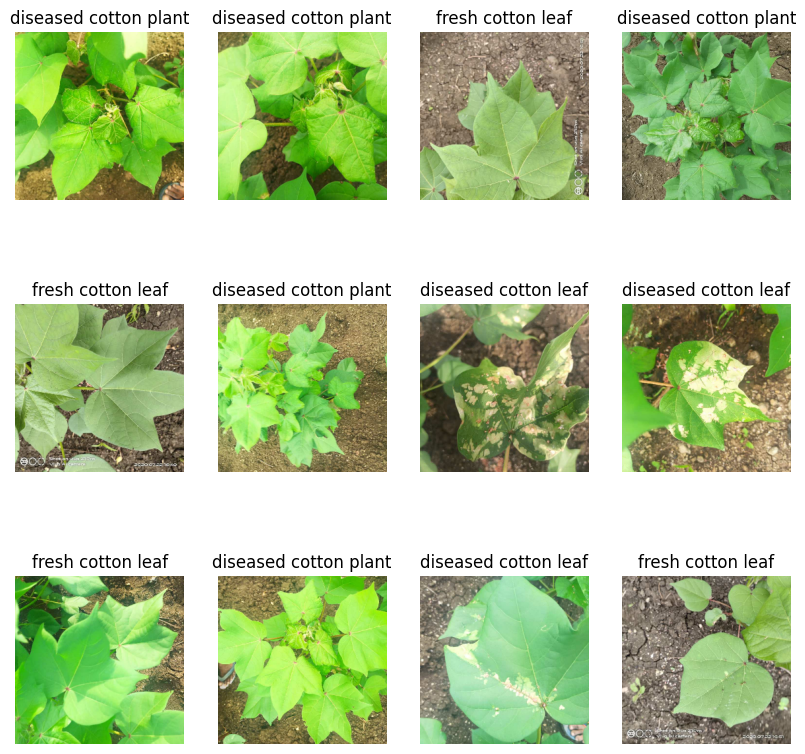

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in basic.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
train_size=1.0
training_ds=basic.take(int(len(basic)*train_size))
len(training_ds)

61

In [ ]:
batch_size=32
img_height=256
img_width=256
val='/content/Cotton Disease/val'

val=tf.keras.preprocessing.image_dataset_from_directory(
    val,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 253 files belonging to 4 classes.


In [ ]:
for image_batch,label_batch in basic.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 1 1 3 1 0 1 0 0 1 3 2 2 2 1 2 0 1 2 3 1 3 1 1 3 0 1 2 1]


In [ ]:
for image_batch,label_batch in basic.take(1):
  print(image_batch[0].numpy())

[[[224.       250.       177.      ]
  [224.       250.       177.      ]
  [224.       250.       177.      ]
  ...
  [ 92.028366 183.18462   66.66322 ]
  [ 92.44531  180.8789    57.01172 ]
  [ 92.743546 181.17714   57.30995 ]]

 [[224.       250.       177.      ]
  [224.       250.       177.      ]
  [224.       250.       177.      ]
  ...
  [ 91.78348  168.6875    58.75836 ]
  [105.62399  174.65915   71.62399 ]
  [109.054184 178.08934   75.054184]]

 [[224.       250.       177.      ]
  [224.       250.       177.      ]
  [224.       250.       177.      ]
  ...
  [133.86449  192.58714   84.032455]
  [158.29604  207.07729  104.96791 ]
  [183.22572  231.64621  129.8976  ]]

 ...

 [[ 95.491165 183.61905   29.896393]
  [ 89.099335 175.78516   19.942245]
  [ 88.75511  178.        20.046585]
  ...
  [169.47777  133.47777   73.47777 ]
  [171.       135.        73.      ]
  [168.85547  132.85547   70.85547 ]]

 [[ 84.85547  179.        23.      ]
  [ 91.56641  175.4336    23.      ]


In [ ]:
val_size=1.0
val_ds=val.take(int(len(val)*val_size))
len(val_ds)

8

In [ ]:
predict='/content/Cotton Disease/test'

predicting_ds=tf.keras.preprocessing.image_dataset_from_directory(
    predict,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)
len(predicting_ds)

Found 106 files belonging to 4 classes.


4

In [ ]:
from keras.layers.preprocessing.image_preprocessing import Resizing
from keras.engine.sequential import Sequential
from keras.layers import Rescaling,Conv2D,MaxPooling2D,Dense,Flatten,GlobalMaxPooling2D,Dropout
model=Sequential()
model.add(Resizing(img_height,img_width))
model.add(Rescaling(1.0/255))
model.add(Conv2D(16,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(GlobalMaxPooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(class_names),activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
r = model.fit(training_ds, validation_data=val_ds,epochs=15)

Epoch 1/15
61/61 [==============================] - 27s 108ms/step - loss: 1.2337 - accuracy: 0.4552 - val_loss: 1.0587 - val_accuracy: 0.4783
Epoch 2/15
61/61 [==============================] - 7s 94ms/step - loss: 0.9979 - accuracy: 0.5546 - val_loss: 0.9187 - val_accuracy: 0.6047
Epoch 3/15
61/61 [==============================] - 7s 108ms/step - loss: 0.8827 - accuracy: 0.6253 - val_loss: 0.8884 - val_accuracy: 0.5415
Epoch 4/15
61/61 [==============================] - 6s 92ms/step - loss: 0.7350 - accuracy: 0.6920 - val_loss: 0.6517 - val_accuracy: 0.7549
Epoch 5/15
61/61 [==============================] - 7s 112ms/step - loss: 0.6503 - accuracy: 0.7391 - val_loss: 0.6995 - val_accuracy: 0.6680
Epoch 6/15
61/61 [==============================] - 6s 93ms/step - loss: 0.6317 - accuracy: 0.7412 - val_loss: 0.5522 - val_accuracy: 0.8221
Epoch 7/15
61/61 [==============================] - 7s 103ms/step - loss: 0.5189 - accuracy: 0.7863 - val_loss: 0.5205 - val_accuracy: 0.8182
Epoch 8/

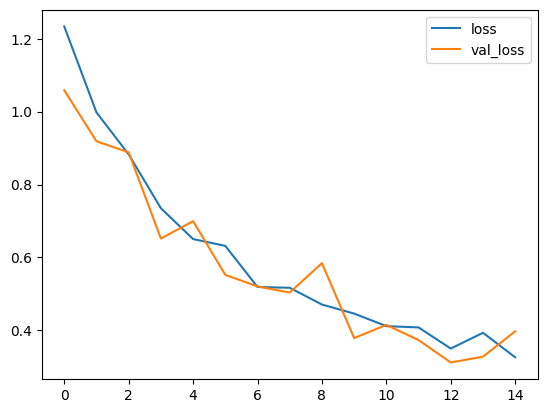

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

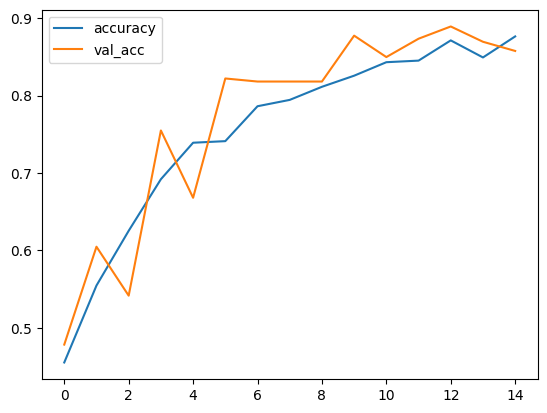

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
test_size=1.0
test_ds=predicting_ds.take(int(len(predicting_ds)*test_size))
len(test_ds)

4

In [ ]:
scores=model.evaluate(test_ds)
scores

4/4 [==============================] - 2s 91ms/step - loss: 0.3875 - accuracy: 0.8585


[0.3874763548374176, 0.8584905862808228]

In [ ]:
model2=Sequential()
model2.add(Resizing(img_height,img_width))
model2.add(Rescaling(1.0/255))
model2.add(Conv2D(16,(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(GlobalMaxPooling2D())
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(len(class_names),activation='softmax'))

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
r = model.fit(training_ds, validation_data=val_ds,epochs=10)

Epoch 1/10
61/61 [==============================] - 7s 111ms/step - loss: 0.2745 - accuracy: 0.8980 - val_loss: 0.2502 - val_accuracy: 0.9209
Epoch 2/10
61/61 [==============================] - 6s 90ms/step - loss: 0.3300 - accuracy: 0.8754 - val_loss: 0.3844 - val_accuracy: 0.8419
Epoch 3/10
61/61 [==============================] - 7s 108ms/step - loss: 0.2735 - accuracy: 0.8990 - val_loss: 0.2867 - val_accuracy: 0.8775
Epoch 4/10
61/61 [==============================] - 6s 86ms/step - loss: 0.2392 - accuracy: 0.9154 - val_loss: 0.2242 - val_accuracy: 0.9289
Epoch 5/10
61/61 [==============================] - 7s 105ms/step - loss: 0.2113 - accuracy: 0.9247 - val_loss: 0.3262 - val_accuracy: 0.8814
Epoch 6/10
61/61 [==============================] - 6s 87ms/step - loss: 0.2038 - accuracy: 0.9288 - val_loss: 0.2978 - val_accuracy: 0.8814
Epoch 7/10
61/61 [==============================] - 7s 103ms/step - loss: 0.1732 - accuracy: 0.9349 - val_loss: 0.2317 - val_accuracy: 0.9130
Epoch 8/1

In [ ]:
model.save("Cotton.h5")

In [ ]:
filename = 'cotton.pkl'
pickle.dump(r, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......global_max_pooling2d
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......rescaling
.........vars
......resizing
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras